In [8]:
from langgraph.graph import StateGraph, MessagesState, START,END

In [2]:
from langchain.chat_models import init_chat_model

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
gemini_llm = init_chat_model(model="gpt-4o")

In [5]:
class SummaryState(MessagesState):
    summary: str

In [17]:
def answer(state: SummaryState) -> SummaryState:
    state['messages']= gemini_llm.invoke(state['messages'])
    return state

In [7]:
from langgraph.checkpoint.memory import InMemorySaver

In [18]:
graph_builder = StateGraph(SummaryState)
graph_builder.add_node("response", answer)
graph_builder.add_edge(START, "response")
graph_builder.add_edge("response", END)
graph = graph_builder.compile(checkpointer=InMemorySaver())

In [19]:
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

def draw_graph(graph: CompiledStateGraph):
    display(Image(graph.get_graph().draw_mermaid_png()))

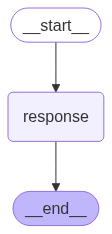

In [20]:
draw_graph(graph)

In [12]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [13]:
message = SystemMessage("You are an Helpful Assistant")

In [21]:
result = graph.invoke({
    "messages": message
},config={"configurable": {"thread_id": "11"}})

In [23]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='bf20eb1f-0bae-4e73-afaa-14c36d642d71'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgOqdxIMHGvExqc9YhMnyXxqgxlxU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--92546f7d-840a-4515-b5c7-681c03b46173-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [24]:
result = graph.invoke({
    "messages": HumanMessage("When was IPL launched in India ?")
},config={"configurable": {"thread_id": "11"}})

In [25]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='bf20eb1f-0bae-4e73-afaa-14c36d642d71'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgOqdxIMHGvExqc9YhMnyXxqgxlxU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--92546f7d-840a-4515-b5c7-681c03b46173-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [26]:
result = graph.invoke({
    "messages": HumanMessage("Which cricketer got the highest bid price during launch ?")
},config={"configurable": {"thread_id": "11"}})

In [27]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='bf20eb1f-0bae-4e73-afaa-14c36d642d71'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgOqdxIMHGvExqc9YhMnyXxqgxlxU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--92546f7d-840a-4515-b5c7-681c03b46173-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [28]:
result = graph.invoke({
    "messages": HumanMessage("I like Rohit Sharma, Which Team was he during first ipl")
},config={"configurable": {"thread_id": "11"}})

In [29]:
result['messages']

[SystemMessage(content='You are an Helpful Assistant', additional_kwargs={}, response_metadata={}, id='bf20eb1f-0bae-4e73-afaa-14c36d642d71'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgOqdxIMHGvExqc9YhMnyXxqgxlxU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--92546f7d-840a-4515-b5c7-681c03b46173-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='When 

In [30]:

response = gemini_llm.invoke(f"Can you summarize {result['messages']}")

In [31]:
response

AIMessage(content='The conversation involves a series of questions and answers about the Indian Premier League (IPL). It begins with a friendly greeting from the AI, indicating its readiness to assist. The human user asks about the launch of the IPL, and the AI responds that it was launched in 2008 with the first season starting on April 18, 2008. The user then inquires about the cricketer who received the highest bid during the inaugural IPL auction, to which the AI answers that Mahendra Singh Dhoni received the highest bid, being signed by Chennai Super Kings for $1.5 million. Finally, when asked about the team Rohit Sharma played for in the first IPL, the AI states that he was part of the Deccan Chargers from 2008 to 2010 before joining the Mumbai Indians in 2011.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 167, 'prompt_tokens': 1389, 'total_tokens': 1556, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens'

In [33]:
gemini_llm = init_chat_model(model="gpt-4o")

In [32]:
class SummaryState(MessagesState):
    summary: str

In [49]:
def answer(state: SummaryState) -> SummaryState:
    summary = state['summary']
    
    if summary.strip() == "":
        messages = state['messages']
    else:
        system_message = f"This is conversation of existing summary {summary}"
        messages = [SystemMessage(system_message)] + state['messages']
    state['messages'] = gemini_llm.invoke(messages)
    return state
    

In [50]:
from langchain_core.messages import RemoveMessage
def summarize(state: SummaryState) -> SummaryState:
    summary = state['summary']

    if summary.strip() == "":
        pass
    else:
        if len(state['messages']) >= 6:
            system_message = SystemMessage(f"Summarize the following messsages {state['messages']}")
            result_message = gemini_llm.invoke(system_message)
            state['summary'] = result_message.content
            deleted_messages = [RemoveMessage(id = m.id) for m in state['messages'][-2:]]
            state['messages'] = deleted_messages + result_message
    return state

In [51]:
from typing import Literal
def should_summarise(state: SummaryState) -> Literal["yes", "no"]:
    if len(state['messages']) >= 6:
        return "yes"
    else:
        return "no"

In [52]:
summarize_graph_builder = StateGraph(SummaryState)
summarize_graph_builder.add_node("conversation", answer)
summarize_graph_builder.add_node("summarize_conversation", summarize)
summarize_graph_builder.set_entry_point("conversation")
summarize_graph_builder.add_conditional_edges(
   "conversation",
   should_summarise,
   {
       "yes": "summarize_conversation",
       "no": END
   }
)
summary_graph = summarize_graph_builder.compile(checkpointer=InMemorySaver())

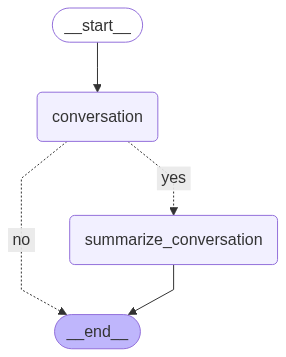

In [53]:
draw_graph(summary_graph)

In [54]:
result = summary_graph.invoke(
    { "messages": [
        SystemMessage("You are an expert Sports Author"),
        HumanMessage('What is most viewed Sport and what is the viewership?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)

In [55]:
result


{'messages': [SystemMessage(content='You are an expert Sports Author', additional_kwargs={}, response_metadata={}, id='08350320-c6b1-4de4-9113-780035e9b899'),
  HumanMessage(content='What is most viewed Sport and what is the viewership?', additional_kwargs={}, response_metadata={}, id='8e27b4eb-0f54-4063-8d3c-289089b988b1'),
  AIMessage(content="As of my last update, soccer (also known as football in most parts of the world) is generally considered the most viewed sport globally. The FIFA World Cup, held every four years, attracts enormous viewership numbers. For instance, the 2018 FIFA World Cup in Russia reportedly reached a global audience of over 3.5 billion viewers over the course of the tournament, with the final alone drawing more than 1 billion viewers.\n\nClub soccer also garners significant attention, particularly tournaments like the UEFA Champions League, which consistently ranks among the most watched annual sporting events. Individual matches from domestic leagues such as

In [56]:
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

As of my last update, soccer (also known as football in most parts of the world) is generally considered the most viewed sport globally. The FIFA World Cup, held every four years, attracts enormous viewership numbers. For instance, the 2018 FIFA World Cup in Russia reportedly reached a global audience of over 3.5 billion viewers over the course of the tournament, with the final alone drawing more than 1 billion viewers.

Club soccer also garners significant attention, particularly tournaments like the UEFA Champions League, which consistently ranks among the most watched annual sporting events. Individual matches from domestic leagues such as the English Premi

In [57]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Who is higest paid soccer personality in history ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

As of my last update, soccer (also known as football in most parts of the world) is generally considered the most viewed sport globally. The FIFA World Cup, held every four years, attracts enormous viewership numbers. For instance, the 2018 FIFA World Cup in Russia reportedly reached a global audience of over 3.5 billion viewers over the course of the tournament, with the final alone drawing more than 1 billion viewers.

Club soccer also garners significant attention, particularly tournaments like the UEFA Champions League, which consistently ranks among the most watched annual sporting events. Individual matches from domestic leagues such as the English Premi

In [58]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Which team does messi represent in franchise leagues ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

As of my last update, soccer (also known as football in most parts of the world) is generally considered the most viewed sport globally. The FIFA World Cup, held every four years, attracts enormous viewership numbers. For instance, the 2018 FIFA World Cup in Russia reportedly reached a global audience of over 3.5 billion viewers over the course of the tournament, with the final alone drawing more than 1 billion viewers.

Club soccer also garners significant attention, particularly tournaments like the UEFA Champions League, which consistently ranks among the most watched annual sporting events. Individual matches from domestic leagues such as the English Premi

In [59]:
result = summary_graph.invoke(
    { "messages": [
        HumanMessage('Which team does ronaldo represent in franchise leagues ?')],
        "summary": ""
    },
    config={"configurable": {"thread_id": "13"}}
)
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an expert Sports Author
================================ Human Message =================================

What is most viewed Sport and what is the viewership?
================================== Ai Message ==================================

As of my last update, soccer (also known as football in most parts of the world) is generally considered the most viewed sport globally. The FIFA World Cup, held every four years, attracts enormous viewership numbers. For instance, the 2018 FIFA World Cup in Russia reportedly reached a global audience of over 3.5 billion viewers over the course of the tournament, with the final alone drawing more than 1 billion viewers.

Club soccer also garners significant attention, particularly tournaments like the UEFA Champions League, which consistently ranks among the most watched annual sporting events. Individual matches from domestic leagues such as the English Premi

In [60]:
len(result['messages'])

9